In [ ]:
%pip install scikit-learn

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

### Loading the dataset

In [2]:
dataset = pd.read_csv('data/possum.csv')

In [3]:
dataset = dataset.dropna()

In [4]:
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [49]:
dataset['Pop'].value_counts(), dataset['sex'].value_counts()

(Pop
 other    58
 Vic      43
 Name: count, dtype: int64,
 sex
 m    59
 f    42
 Name: count, dtype: int64)

## For simplexity

In [58]:
X = dataset[['Pop','age','hdlngth','skullw','totlngth','taill','chest','earconch','belly']]
y = dataset['sex']

In [59]:
X['Pop'] = X['Pop'].map({'Vic': 0, 'other': 1})
y = y.map({'m': 0, 'f': 1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_34728\1794660921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Pop'] = X['Pop'].map({'Vic': 0, 'other': 1})


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=0)

## StandardScaler
Bring all the datapoint to x ~ N(0,I)

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [62]:
scaler.mean_

array([ 0.5875 ,  3.9125 , 92.7175 , 56.765  , 86.98375, 37.025  ,
       27.0125 , 48.0275 , 32.7    ])

In [63]:
scaler.var_

array([ 0.24234375,  3.52984375, 12.28644375,  6.288025  , 16.44836094,
        4.224375  ,  3.04984375, 16.08674375,  7.185     ])

In [64]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model

In [65]:
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_hat = linear_model.predict(X_test)

In [71]:
accuracy_score(y_test, y_hat)

0.6190476190476191

## Logistic Regression Mathematical Details

In [74]:
import matplotlib.pyplot as plt

We create a dataset of 2 different variable `RED` and `GREEN`. We need to find a way to separate these 2 tyoe.

In [110]:
RED = np.array([[1.,3.],[2.,2.5],[3.,2.],[4.,1.5],[5.,1.],[6.,0.5],[7.,0.]])
GREEN = RED[:,:2] + np.ones((7,2))*0.7
RED+=np.random.randn(7,2)*0.2
GREEN-=np.random.randn(7,2)*0.2

size = RED.shape[0]

In [111]:
RED = np.concatenate([RED, np.ones((size,1))], axis=1)
GREEN = np.concatenate([GREEN, np.zeros((size,1))], axis=1)
Dataset = np.concatenate([RED, GREEN], axis=0)
np.random.shuffle(Dataset)

In [152]:
y = Dataset[:,-1].reshape(-1,1)
X = np.concatenate([np.ones((Dataset.shape[0],1)), Dataset[:,:-1]], axis=1)

In [123]:
X

array([[ 1.00000000e+00,  7.77973922e+00,  3.07188370e-01],
       [ 1.00000000e+00,  4.75480197e+00,  2.13320180e+00],
       [ 1.00000000e+00,  3.86973703e+00,  1.47017315e+00],
       [ 1.00000000e+00,  2.86107314e+00,  1.96819105e+00],
       [ 1.00000000e+00,  6.00880289e+00,  6.92697929e-01],
       [ 1.00000000e+00,  1.95385173e+00,  2.47163763e+00],
       [ 1.00000000e+00,  6.91893666e+00, -4.72372615e-03],
       [ 1.00000000e+00,  1.03085868e+00,  3.03779208e+00],
       [ 1.00000000e+00,  5.40442587e+00,  1.36579594e+00],
       [ 1.00000000e+00,  2.66029416e+00,  3.30765225e+00],
       [ 1.00000000e+00,  5.16575422e+00,  8.66377219e-01],
       [ 1.00000000e+00,  6.88677732e+00,  1.68250373e+00],
       [ 1.00000000e+00,  3.71718082e+00,  2.69772850e+00],
       [ 1.00000000e+00,  1.55009064e+00,  3.66739188e+00]])

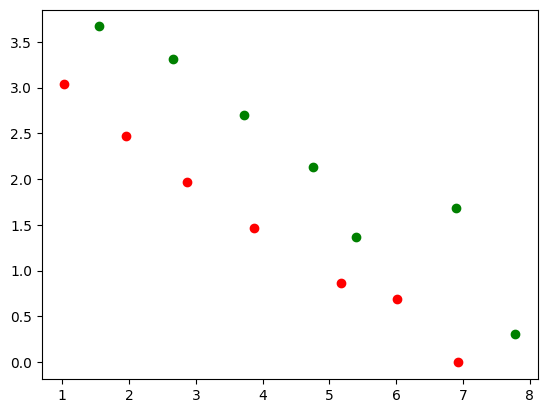

In [132]:
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')

The key to the classification lies on the sigmoid function, denote $\sigma$

$$
    \sigma(x) = \frac{1}{1+e^{-x}}
$$

The value of $\sigma(x)$ will alway lies on D = (0,1)
![sigmoid](https://statstest.b-cdn.net/wp-content/uploads/2020/05/Simple-Logistic-Regression.jpg)

The loss function of Logistic function will be the BCE Loss (Binary Cross Entropy Loss)

$$
L = -(y*log(\hat{y})+(1-y)*log(1-\hat{y}))
$$
Which its partial derivative is 
$$
\frac{\partial L}{\partial w} = \hat{y}-y
$$

And we will use gradient descent to solve the problem

In [142]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def logistic(x,w):
    return sigmoid(x@w)

def bce_loss(y,y_hat):
    return -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

def gradf(x,y,y_hat):
    return (x.T@(y_hat-y))/y.shape[0]

In [148]:
w = np.random.random((3,1))
w

array([[0.78443089],
       [0.12065139],
       [0.13488182]])

C:\Users\Admin\AppData\Local\Temp\ipykernel_34728\2323090369.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x02 = float(-(w[0]) / w[2])
C:\Users\Admin\AppData\Local\Temp\ipykernel_34728\2323090369.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x11 = float(-(w[0]) / w[1])


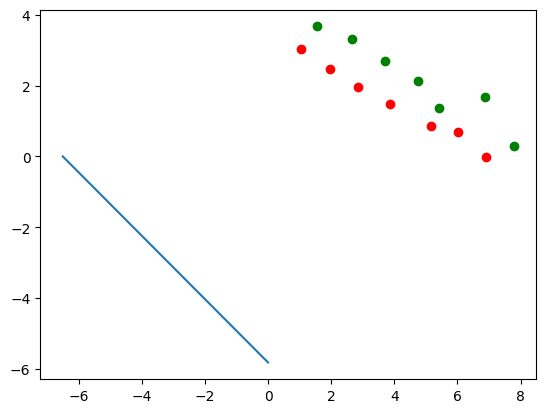

In [149]:
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')

x01 = 0
x02 = float(-(w[0]) / w[2])
x12 = 0
x11 = float(-(w[0]) / w[1])

x01, x02, x11, x12
plt.plot([x01, x11], [x02, x12])

### Training

In [160]:
def train(x, y, w, lr, iter,tol):
  losses=[]
  prev_w = w
  for _ in range(iter):
    y_hat = logistic(x, w)
    
    loss = bce_loss(y,y_hat)
    grad = gradf(x,y,y_hat)
    prev_w = w
    w = w - lr*grad
    if np.linalg.norm(prev_w - w) < tol:
      break
    losses.append(loss)

  return w, losses

[[22.73736396]
 [-2.93727834]
 [-5.72619144]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_34728\271552865.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x02 = float(-(w[0]) / w[2])
C:\Users\Admin\AppData\Local\Temp\ipykernel_34728\271552865.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x11 = float(-(w[0]) / w[1])


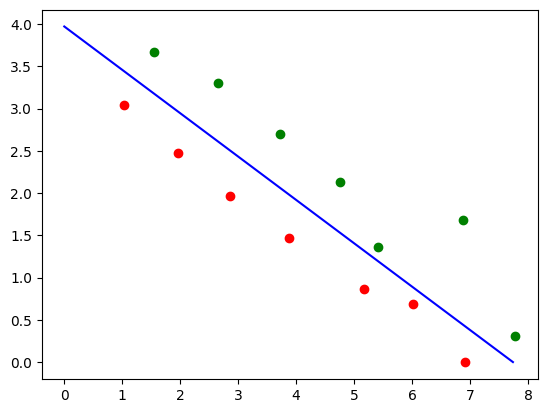

In [161]:
w, losses = train(X, y, w, lr=.45, iter=1000,tol=1e-5)
print(w)
x01 = 0
x02 = float(-(w[0]) / w[2])
x12 = 0
x11 = float(-(w[0]) / w[1])
plt.plot([x01, x11], [x02, x12], c='b')
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')


### Problems with Logistic Regression

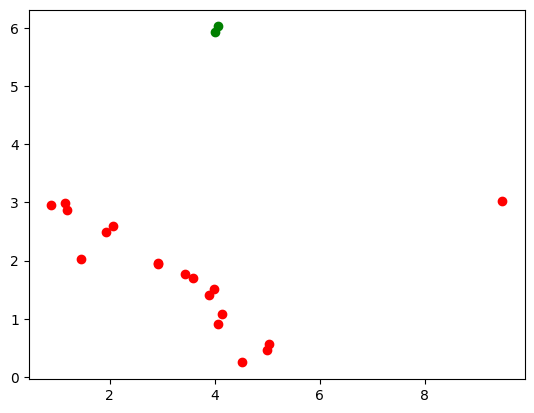

In [212]:
RED = np.array([[1.,3.],[1,3.],[2.,2.5],[3.,2.],[3.5,1.7],[4.,1.5],[4.1,1.],[5.,0.5],[4.5,0.],[1.,3.],[1.5,2],[2.,2.5],[3.,2.],[3.5,1.7],[4.,1.5],[4.1,1.],[5.,0.5],[9.5,3]])
GREEN = RED[:,:2] + np.ones((18,2))*3
RED+=np.random.randn(18,2)*0.1
GREEN-=np.random.randn(18,2)*0.1


size = RED.shape[0]
RED = np.concatenate([RED, np.ones((size,1))], axis=1)
GREEN = np.concatenate([GREEN, np.zeros((size,1))], axis=1)[:2,:]

Dataset = np.concatenate([RED, GREEN], axis=0)
np.random.shuffle(Dataset)
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')



In [213]:
y = Dataset[:,-1].reshape(-1,1)
X = np.concatenate([np.ones((Dataset.shape[0],1)), Dataset[:,:-1]], axis=1)

[[11.65433703]
 [ 0.15865292]
 [-2.69837272]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_34728\2917581198.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x02 = float(-(w[0]) / w[2])
C:\Users\Admin\AppData\Local\Temp\ipykernel_34728\2917581198.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x11 = float(-(w[0]) / w[1])


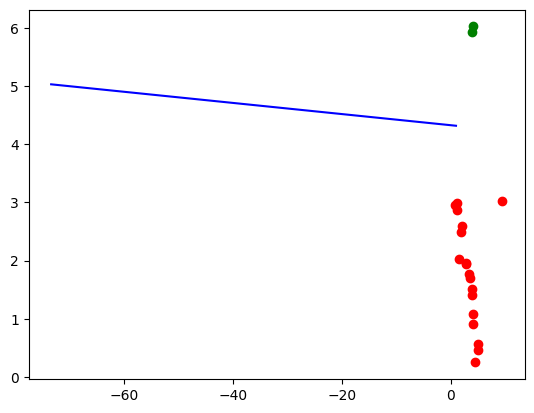

In [214]:
w = np.random.random((3,1))
w, losses = train(X, y, w, lr=.45, iter=10000,tol=1e-3)
print(w)
x01 = X[0,0]
x02 = float(-(w[0]) / w[2])
x12 = X[0,1]
x11 = float(-(w[0]) / w[1])
plt.plot([x01, x11], [x02, x12], c='b')
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')